# <center> <font style="color:rgb(100,109,254)"> Corner Detectors  </font> </center>
We have seen how powerful these feature detectors and descriptor are, we will now use them in Opencv, Now there are multiple algorithms available some of these algorithms are capable of both feature detection and description while others can only handle one case.

Since Corners are the strongest features in an image, we will look at some algorithms which are excellent corner / feature detectors.

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## <font style="color:rgb(134,19,348)">  Harris Corner Detection  </font>
As we know Corners are regions in the image with large variation in intensity in all the directions. One early attempt to find these corners was done by **Chris Harris** & **Mike Stephens** in their paper **A Combined Corner and Edge Detector** in 1988, so now it is called **Harris Corner Detector**.  It just finds difference in intensity in all directions for some displacement.

[``` dst = cv2.cornerHarris( src, blockSize, ksize, k[, dst[, borderType]] ) ```](https://docs.opencv.org/4.2.0/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345)


**Params:**

- **src**	Input single-channel 8-bit or floating-point image.
- **dst**	Image to store the Harris detector responses. It has the type CV_32FC1 and the same size as src .
- **blockSize**	Neighborhood size (see the details on cornerEigenValsAndVecs ).
- **ksize**	Aperture parameter for the Sobel operator.
- **k**	Harris detector free parameter. See the formula above.
- **borderType**	Pixel extrapolation method. See [BorderTypes](https://docs.opencv.org/master/d2/de8/group__core__array.html#ga209f2f4869e304c82d07739337eae7c5).

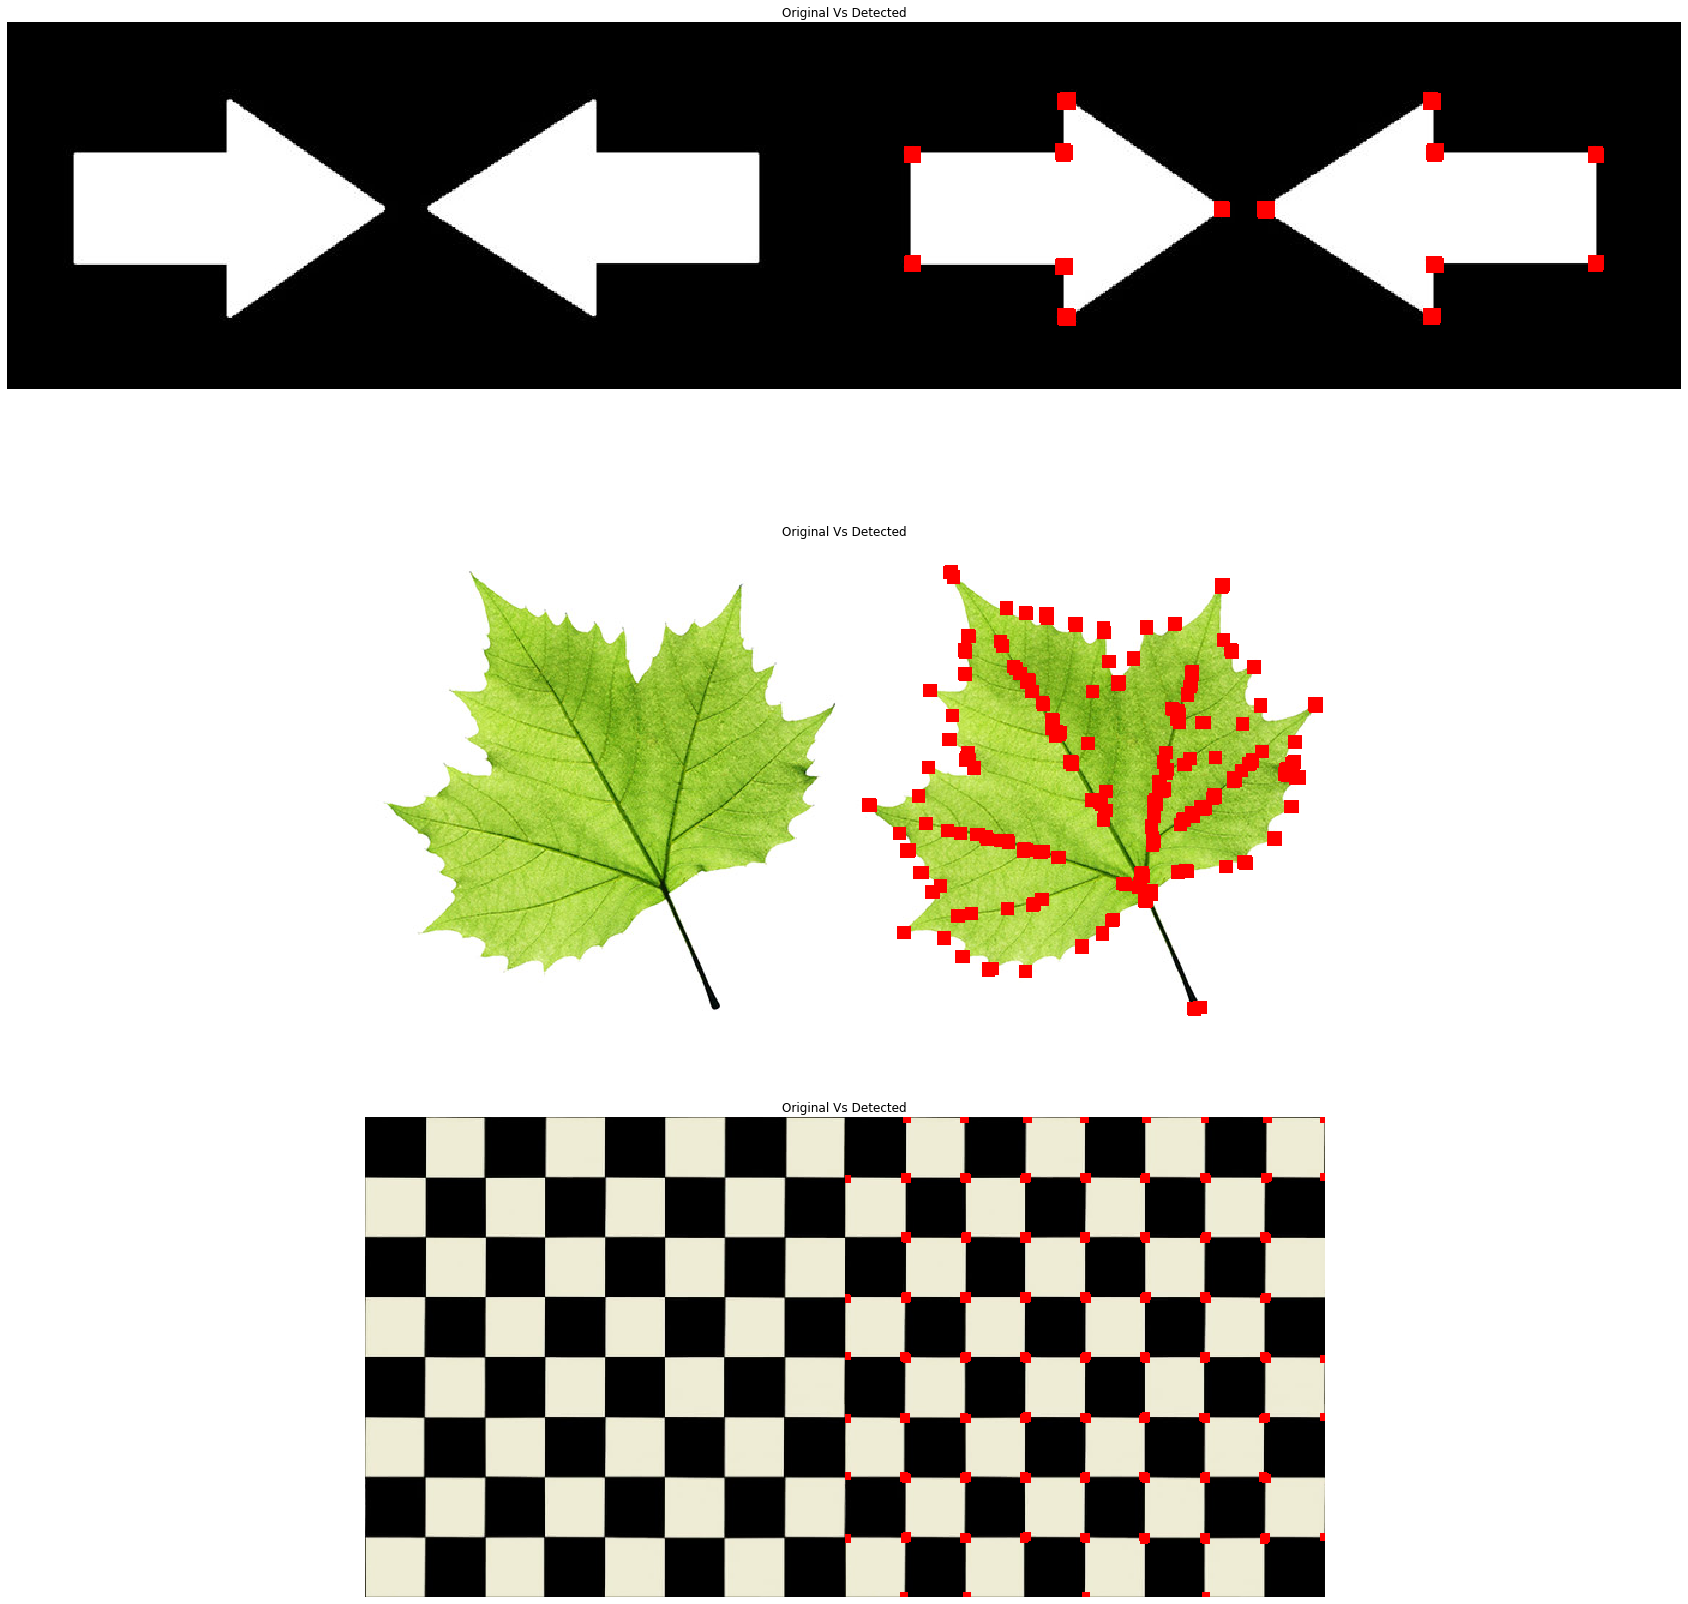

In [9]:
imglist = ['media/M4/thearrows.jpg','media/M4/theleaf.jpg','media/M4/chess.jpg']
plt.figure(figsize=[30,30])

for idx,img_name in enumerate(imglist,1):
    img = cv2.imread(img_name)
    orig=img.copy()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    dst = cv2.cornerHarris(gray,2,3,0.04) 

    #result is dilated for marking the corners, not important
    dst = cv2.dilate(dst,None,iterations=5)

    # Threshold for an optimal value, it may vary depending on the image, play with this threshold to get the results you want
    img[dst > 0.01*dst.max()]=[0,0,255]  #turn all corner pixels to red
    
    final = np.hstack((orig,img))
    plt.subplot(3,1,idx);plt.imshow(final[:,:,::-1]);plt.title("Original Vs Detected");plt.axis('off')

## <font style="color:rgb(134,19,348)">  Shi-Tomasi Corner Detector Or Good Features to Track  </font>
 **Shi** and **Tomasi** made a small modification to harris corner detection in their paper **Good Features to Track** which shows better results compared to Harris Corner Detector.
 
To use it you use the function **cv2.goodFeaturesToTrack()**, first you pass in a a gray scale image, you specify number of corners you want to find, you also specify the quality level, which is a value between 0-1, which denotes the minimum quality of a corner. Finally we provide the minimum euclidean distance between corners detected, this is the like the minDist param in hough circles.


Using all the above information the function finds corners in the image. All corners below quality level are rejected. Then it sorts the remaining corners based on quality in the descending order. Then function takes first strongest corners , throws away all the nearby corners in the range of minimum distance and returns N (N is set by you) strongest corners.


[``` corners	=	cv2.goodFeaturesToTrack(	image, maxCorners, qualityLevel, minDistance[, corners[, mask[, blockSize[, useHarrisDetector[, k]]]]]) ```](https://docs.opencv.org/4.2.0/dd/d1a/group__imgproc__feature.html#ga1d6bb77486c8f92d79c8793ad995d541)

**Params:**

- **`image`**	Input 8-bit or floating-point 32-bit, single-channel image.
corners	Output vector of detected corners.
- **`maxCorners`**	Maximum number of corners to return. If there are more corners than are found, the strongest of them is returned. maxCorners <= 0 implies that no limit on the maximum is set and all detected corners are returned.
- **`qualityLevel`**	Parameter characterizing the minimal accepted quality of image corners. The parameter value is multiplied by the best corner quality measure, which is the minimal eigenvalue (see cornerMinEigenVal ) or the Harris function response (see cornerHarris ). The corners with the quality measure less than the product are rejected. For example, if the best corner has the quality measure = 1500, and the quality Level=0.01 , then all the corners with the quality measure less than 15 are rejected.
- **`minDistance`**	Minimum possible Euclidean distance between the returned corners.
- **`mask`**	Optional region of interest. If the image is not empty (it needs to have the type CV_8UC1 and the same size as image ), it specifies the region in which the corners are detected.
- **`blockSize`**	Size of an average block for computing a derivative covariation matrix over each pixel neighborhood. See cornerEigenValsAndVecs .
- **`useHarrisDetector`**	Parameter indicating whether to use a Harris detector (see cornerHarris) or cornerMinEigenVal.
- **`k`**	Free parameter of the Harris detector.


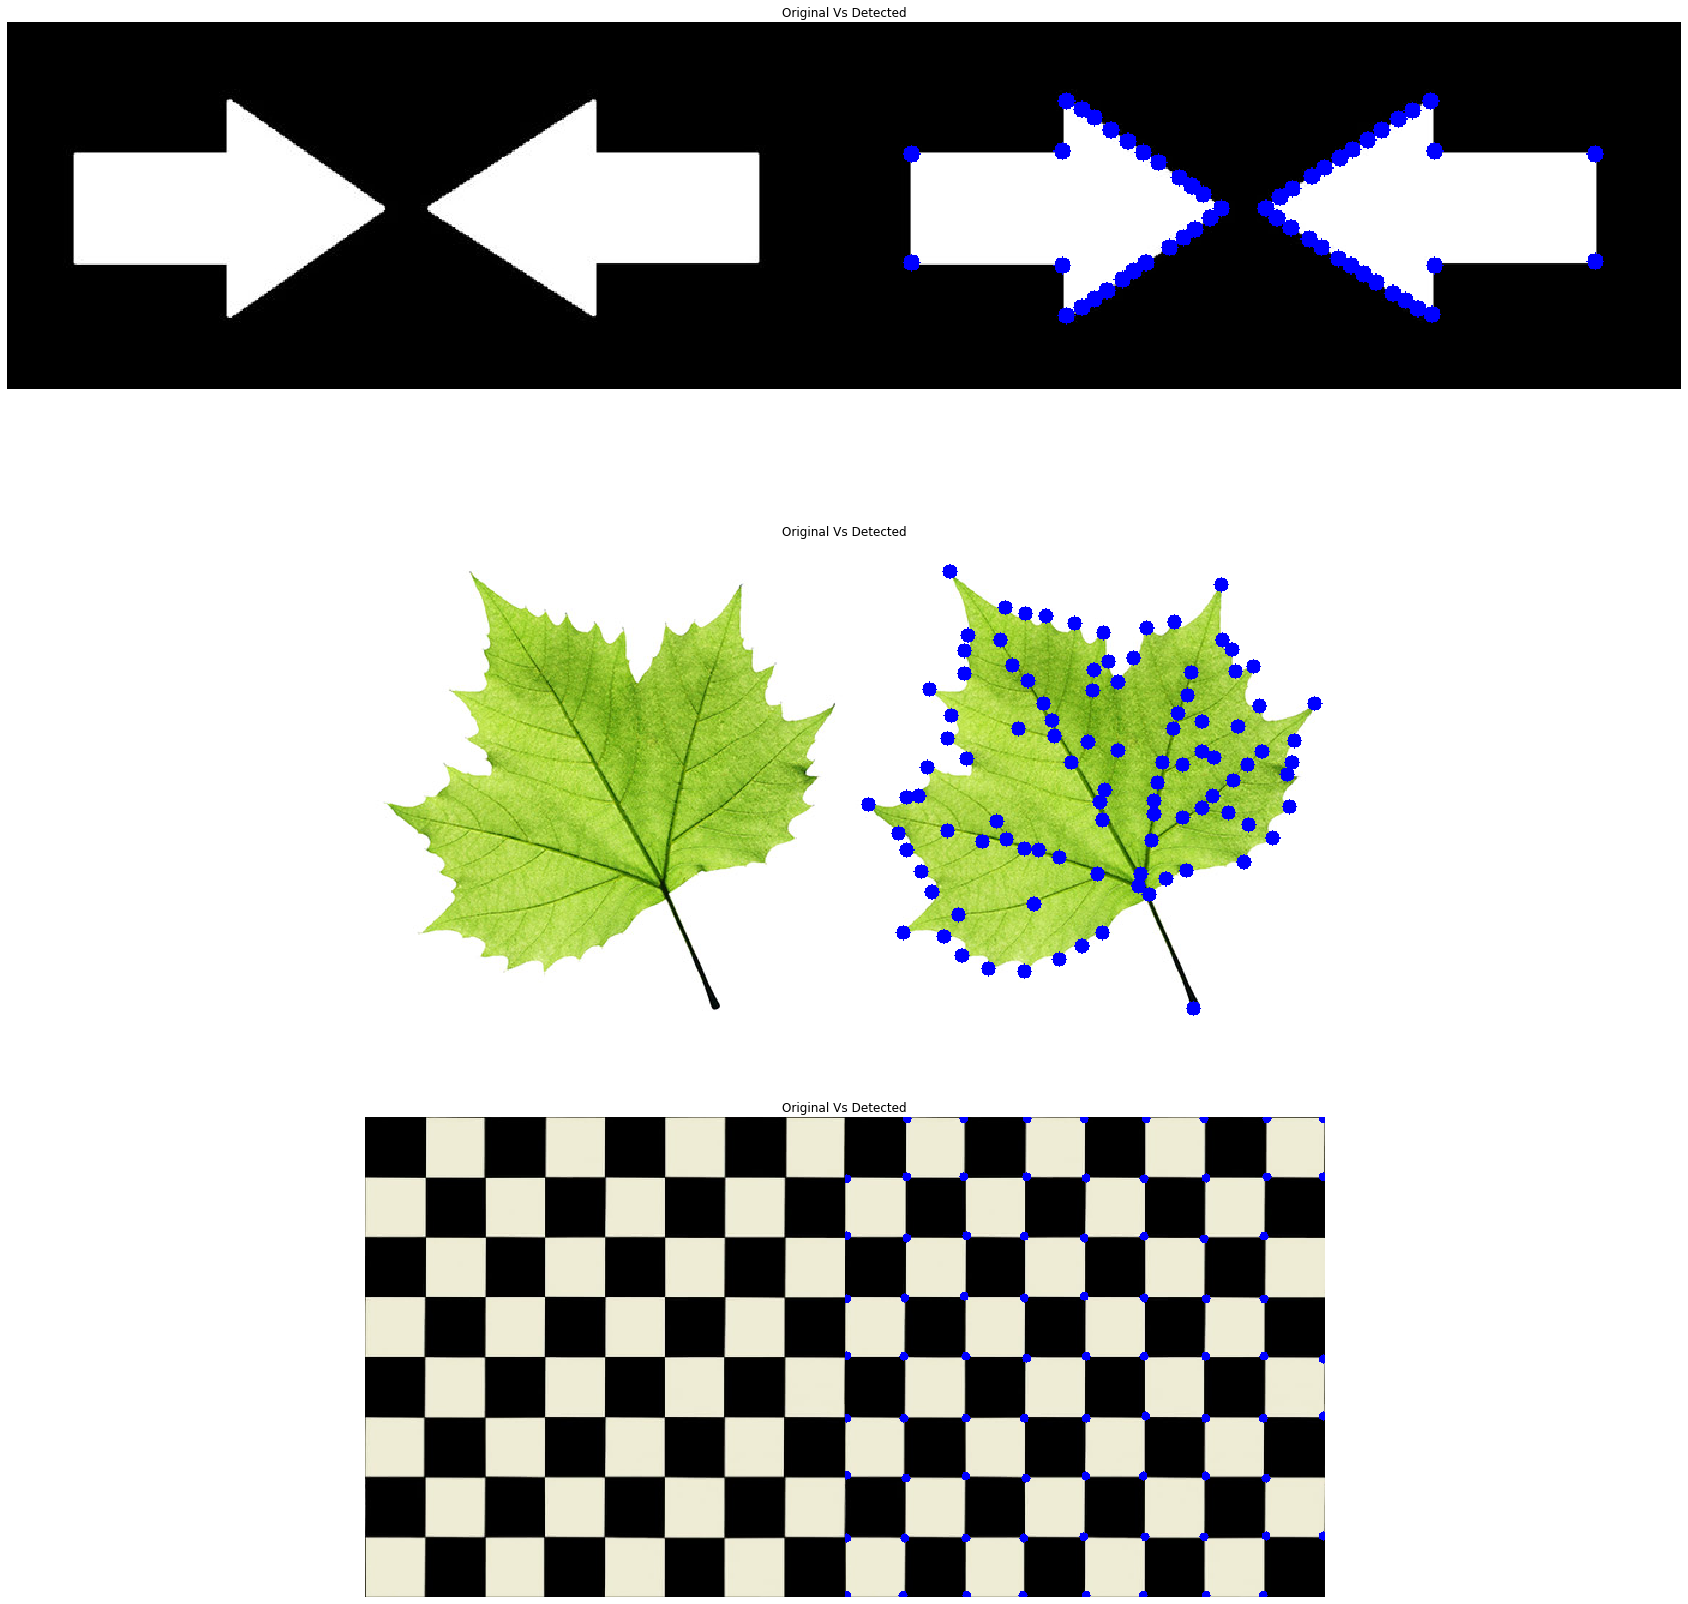

In [13]:
imglist = ['media/M4/thearrows.jpg','media/M4/theleaf.jpg','media/M4/chess.jpg']
plt.figure(figsize=[30,30])

for idx,img_name in enumerate(imglist,1):
    img = cv2.imread(img_name)
    orig=img.copy()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    corners = cv2.goodFeaturesToTrack(gray,100,0.01,10)     
    corners = np.int0(corners) 

    for i in corners:    
        # break the array  to x and y points
        x,y = i.ravel()  
        cv2.circle(img,(x,y),6,255,-1)

    final = np.hstack((orig,img))
    plt.subplot(3,1,idx);plt.imshow(final[:,:,::-1]);plt.title("Original Vs Detected");plt.axis('off')